<h1>D208 - Predictive Modeling (Task 1)</h1>
<h2>By: Jacob Colp</h2>

<h3>A1.</h3>

What features best predict initial admissions day?

<h3>A2.</h3>

The goal of the data analysis is to identify important features in distinguishing the number of days that a patient will spend in the hospital. Being able to identify this will allow the hospital to better strategize staffing, admission and overall patient care. Rather than leaving patients on more acute floors - we may be able to transfer them to long term units in an effort to enhance care for all parties.

<h3>B1.</h3>

Multiple Linear Regression follows the same assumptions as simple linear regression. Those assumptions are as follows (https://www.scribbr.com/statistics/multiple-linear-regression/):

<li>Homogeneity of Variance (Homoscedasticity): This essentially means that the variance of observations is similar among variables. So, if we look at them on a scatter plot - their spread should look pretty similar. There are specific ways to test this, but that is the most simple explanation! (https://blog.minitab.com/en/statistics-and-quality-data-analysis/dont-be-a-victim-of-statistical-hippopotomonstrosesquipedaliophobia)</li>

<li>Independence of Observations (No multicolinearity): So, I think the easiest way to understand this is with an example. And, for ease - lets use the current dataset. One instance that I have observed of multicolinearity exists between initial days and total charge. If you were to blindly evaluate the relationships between all of our variables - you would see their relationship and think "Woah!" But, if we pause for just a second and think, you would also recognize that this makes perfect sense. And, these are really going to explain the same variance within the data. You would expect the price to increase with the number of days

<li>Normality: Data needs to follow a normal distribution</li>

<li>Linearity: The line of best fit through the data points is a straight line, and not curved.</li>


<h3>B2.</h3>

There are several advantages to utilizing the Python programming language in any form of analysis. In this instance - I believe that the largest advantage is the fact that there are several packages available to complete this particular problem. The Python community has done a great job of creating packages that address data problems at different levels. A great explanation of a few popular packages can be found here: https://towardsdatascience.com/3-top-python-packages-to-learn-statistic-for-data-scientist-d753b76e6099. With these packages - a lot of heavy lifting has been done by the developers and it allows you to focus more on the analysis than the algorithm itself. Outside of that - I prefer Python to R for its overall flexibility and support. Python makes the ingestion and exploration of data really easy with Pandas and Numpy. Visualization packages like Seaborn and Matplotlib allow you to visualize different parts of your analysis to gain visual insight. Finally, my preference lies in the Python syntax. I have utilized R a few times, but I have never found the syntax to be as intuitive. I will concede that I learned Python first, and I am sure that is the main cause, but it holds a special place in my heart.

<h3>B3.</h3>

My research question seeks to understand variables that are going to best explain initial admission days. For a hospital - I believe that being able to understand those factor will serve both the patient and hospital better. Doctors will be able to appropriately set expectations with patients and better be able to triage them throughout their stay. I believe that multiple linear regression is the appropriate solution for this question, because it allows us to understand the interplay of multiple variables. It would be naive to assume that any accurate estimation could be made for a patients stay based upon only a single factor. Being able to play around with different variable combinations for solid correlation will allow us to identify those key variables. It will also help to alleviate any impact from confounding variables (Spiegelhalter, 2019). We will better be able to fully evaluate the impact of all variables on our dependent variable.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [40]:
med_df = pd.read_csv('medical_clean.csv')

In [41]:
med_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [42]:
#Essentially boiler plate code at this point. I have just copy and pasted this from my D207 project
#This just renames our survey question columns to be less ambiguous

med_df.rename({'Item1':'Survey_Timely_Admission', 'Item2':'Survey_Timely_Treatment', 'Item3':'Survey_Timely_Visits', 'Item4':'Survey_Reliability', 'Item5':'Survey_Options', 'Item6':'Survey_Hours_of_Treatment','Item7':'Survey_Courteous_Staff', 'Item8':'Survey_Evidence_of_Active_Listening'},axis=1, inplace=True)

med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

<h3>C1.</h3>

My main data preparation goals will differ somewhat from a real-world project. I benefit from the pre-existing knowledge of a clean and prepared data set (validated above with the info function). This removes the need for any kind of imputation. However, I prefer to convert ordinal sting values to a more clear ordinal numeric value. I will also convert Yes/No columns to binary values. Outside of these steps - I will also split the dataset into a training/test set and scale numeric features. Splitting data into a training and test set will allow us to validate the efficacy of any model. Scaling features will normalize values around a 0 mean. Scaling will help us to minimize the impact of the different scales of measurement that may be found in our data set. I will also be checking for multicollinearity in this step as well. That will help to narrow the feature selection and ensure that we are not overfitting by having variability explained by multiple features. (https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html)

<h3>C2.</h3>

Specific summary statistics can be found above as output by the describe function. There are 50 columns with 10,000 non-null rows a piece. At initial glance - the most outstanding thing is drastically different scales of data. Populations and Incomes reach into the hundreds or thousands where other features, such as children, will max out around 10. Other interesting behavior can be found in those same feature and offer a sobering reminder of where summary statistics can fail. The max of population is just over 122,000 and the minimum is 0. That places the mean value around 9,000. Without looking at the distribution of data - I can say, with a high level of confidence, that this mean is does not best represent this particular feature. Perhaps a median would be a better singular value to represent central tendency, or maybe this feature's behavior is too complex to be understood by a single metric. I would also like to draw attention to our dependent feature (Initial_Days), because it would appear to have similar behavior. The mean may be representative of our data set, but I would struggle to believe that the average hospital stay is over a month. That in and of itself may be cause for concern in our data collection process. The sample may not be representative of the underlying population. My list of predictor variables will be:

<li>Age</li>
<li>Income</li>
<li>VitD_Levels</li>
<li>Doc_Visits</li>
<li>Soft_Drink</li>
<li>HighBlood</li>
<li>Complication_Risk</li>
<li>Overweight</li>
<li>Stroke</li>

In [43]:
#Essentially boiler plate code at this point. I have just copy and pasted this from my D207 project
#This encodes categorical variables into numeric values. For our binary - it replaces yes and no with 1 and 0. For complication risk - it encodes High, Medium and Low with ordinal values of 1,2, and 3. I then print out the value counts again to verify its implementation.

med_df.Complication_risk.replace({'High':3,'Medium':2,'Low':1}, inplace=True)

for x in med_df:
    if med_df[x].dtype == 'object':
        med_df[x].replace({'Yes':1,'No':0}, inplace=True)
    else:
        continue

for x in med_df:
    print(med_df[x].value_counts())

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: CaseOrder, Length: 10000, dtype: int64
C412403    1
D294364    1
B203210    1
C20177     1
K216020    1
          ..
J694995    1
N704840    1
A197688    1
H115454    1
I569847    1
Name: Customer_id, Length: 10000, dtype: int64
8cd49b13-f45a-4b47-a2bd-173ffa932c2f    1
dc1799a6-61d1-44a3-9b94-b89584baddfc    1
dc6bab10-659b-4c78-ba87-87ffa3def32f    1
1cb70cc8-47b7-4192-8bed-faad0f27ab3b    1
06d0da86-5600-472d-a35d-7632775b5cd7    1
                                       ..
2d5c049d-0431-443f-a9d7-46f875998599    1
4ccc7838-5c2c-4a3c-9e3b-2a646cec157e    1
4767cd0e-626d-4c5a-834e-a948aba315c2    1
8b1e1ea3-e596-4a97-b2cb-7f9926e9fbee    1
bc482c02-f8c9-4423-99de-3db5e62a18d5    1
Name: Interaction, Length: 10000, dtype: int64
3a83ddb66e2ae73798bdf1d705dc0932    1
5d85418e862aab28ed18975446153694    1
28970195a839f74e572d2f43bd7fcb71    1
24665d1c5070b579d0c19

In [44]:
#Here I will be scaling the dataset to better account for the broad distribution of different data object. I will do this utilizing the standard scaler function from scikit-learn's preprocessing module.
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#This is me writing a note to myself to ensure that I inverse the transformation to get accurate predictions on the other side of model training.

scaler = preprocessing.StandardScaler()

med_df_scaled = pd.DataFrame(scaler.fit_transform(med_df[['Age', 'Income', 'Initial_days', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'HighBlood', 'Complication_risk', 'Overweight', 'Stroke']]), columns=['Age', 'Income', 'Initial_days', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'HighBlood', 'Complication_risk', 'Overweight', 'Stroke'])

#Here I am splitting out the outcome variable into its own data frame for the eventual training and test sets
Initial_days_df = med_df_scaled.Initial_days
predictor_variables_df = med_df_scaled.drop('Initial_days',axis=1)

predictor_variables_df

,Age,Income,VitD_levels,Doc_visits,Soft_drink,HighBlood,Complication_risk,Overweight,Stroke
0,-0.024795,1.615914,0.583603,0.944647,-0.588898,1.202076,-0.168873,-1.562420,-0.498906
1,-0.121706,0.221443,0.483901,-0.967981,-0.588898,1.202076,1.200737,0.640033,-0.498906
2,-0.024795,-0.915870,0.046227,-0.967981,-0.588898,1.202076,-0.168873,0.640033,-0.498906
3,1.186592,-0.026263,-0.687811,-0.967981,-0.588898,-0.831894,-0.168873,-1.562420,2.004386
4,-1.526914,-1.377325,-0.260366,-0.011667,1.698086,-0.831894,-1.538483,-1.562420,-0.498906
...,...,...,...,...,...,...,...,...,...
9995,-1.381548,0.192047,-0.487525,-0.967981,-0.588898,1.202076,-0.168873,-1.562420,-0.498906
9996,1.622691,-0.894380,0.105476,-0.011667,-0.588898,1.202076,-0.168873,0.640033,-0.498906
9997,-0.412438,0.891569,-0.414049,-0.967981,1.698086,1.202076,1.200737,0.640033,-0.498906
9998,-0.509349,-0.378271,0.964820,-0.011667,-0.588898,-0.831894,-0.168873,0.640033,-0.498906


<AxesSubplot:>

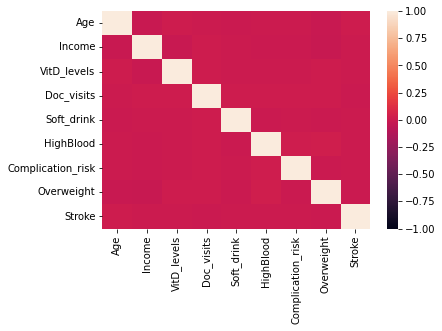

In [45]:
#Here I am generating a heatmap to check for any multicollineartiy. I expand the minimum out to -1 to ensure that we don't have any strong inverse relationships.

sns.heatmap(predictor_variables_df.corr(), vmin=-1.0)

In [46]:
#Here I am splitting out the training and test sets for our predictor and outcome variables
#https://realpython.com/train-test-split-python-data/

X_Train, X_Test, Y_Train, Y_Test = train_test_split(predictor_variables_df, Initial_days_df)

X_Train.reset_index(drop=True)
X_Test.reset_index(drop=True)
Y_Train.reset_index(drop=True)
Y_Test.reset_index(drop=True)

0       1.425757
1      -0.900562
2       1.390466
3      -1.018287
4      -0.677770
          ...   
2495    1.121475
2496   -1.130184
2497   -0.847284
2498    1.102663
2499   -0.914616
Name: Initial_days, Length: 2500, dtype: float64

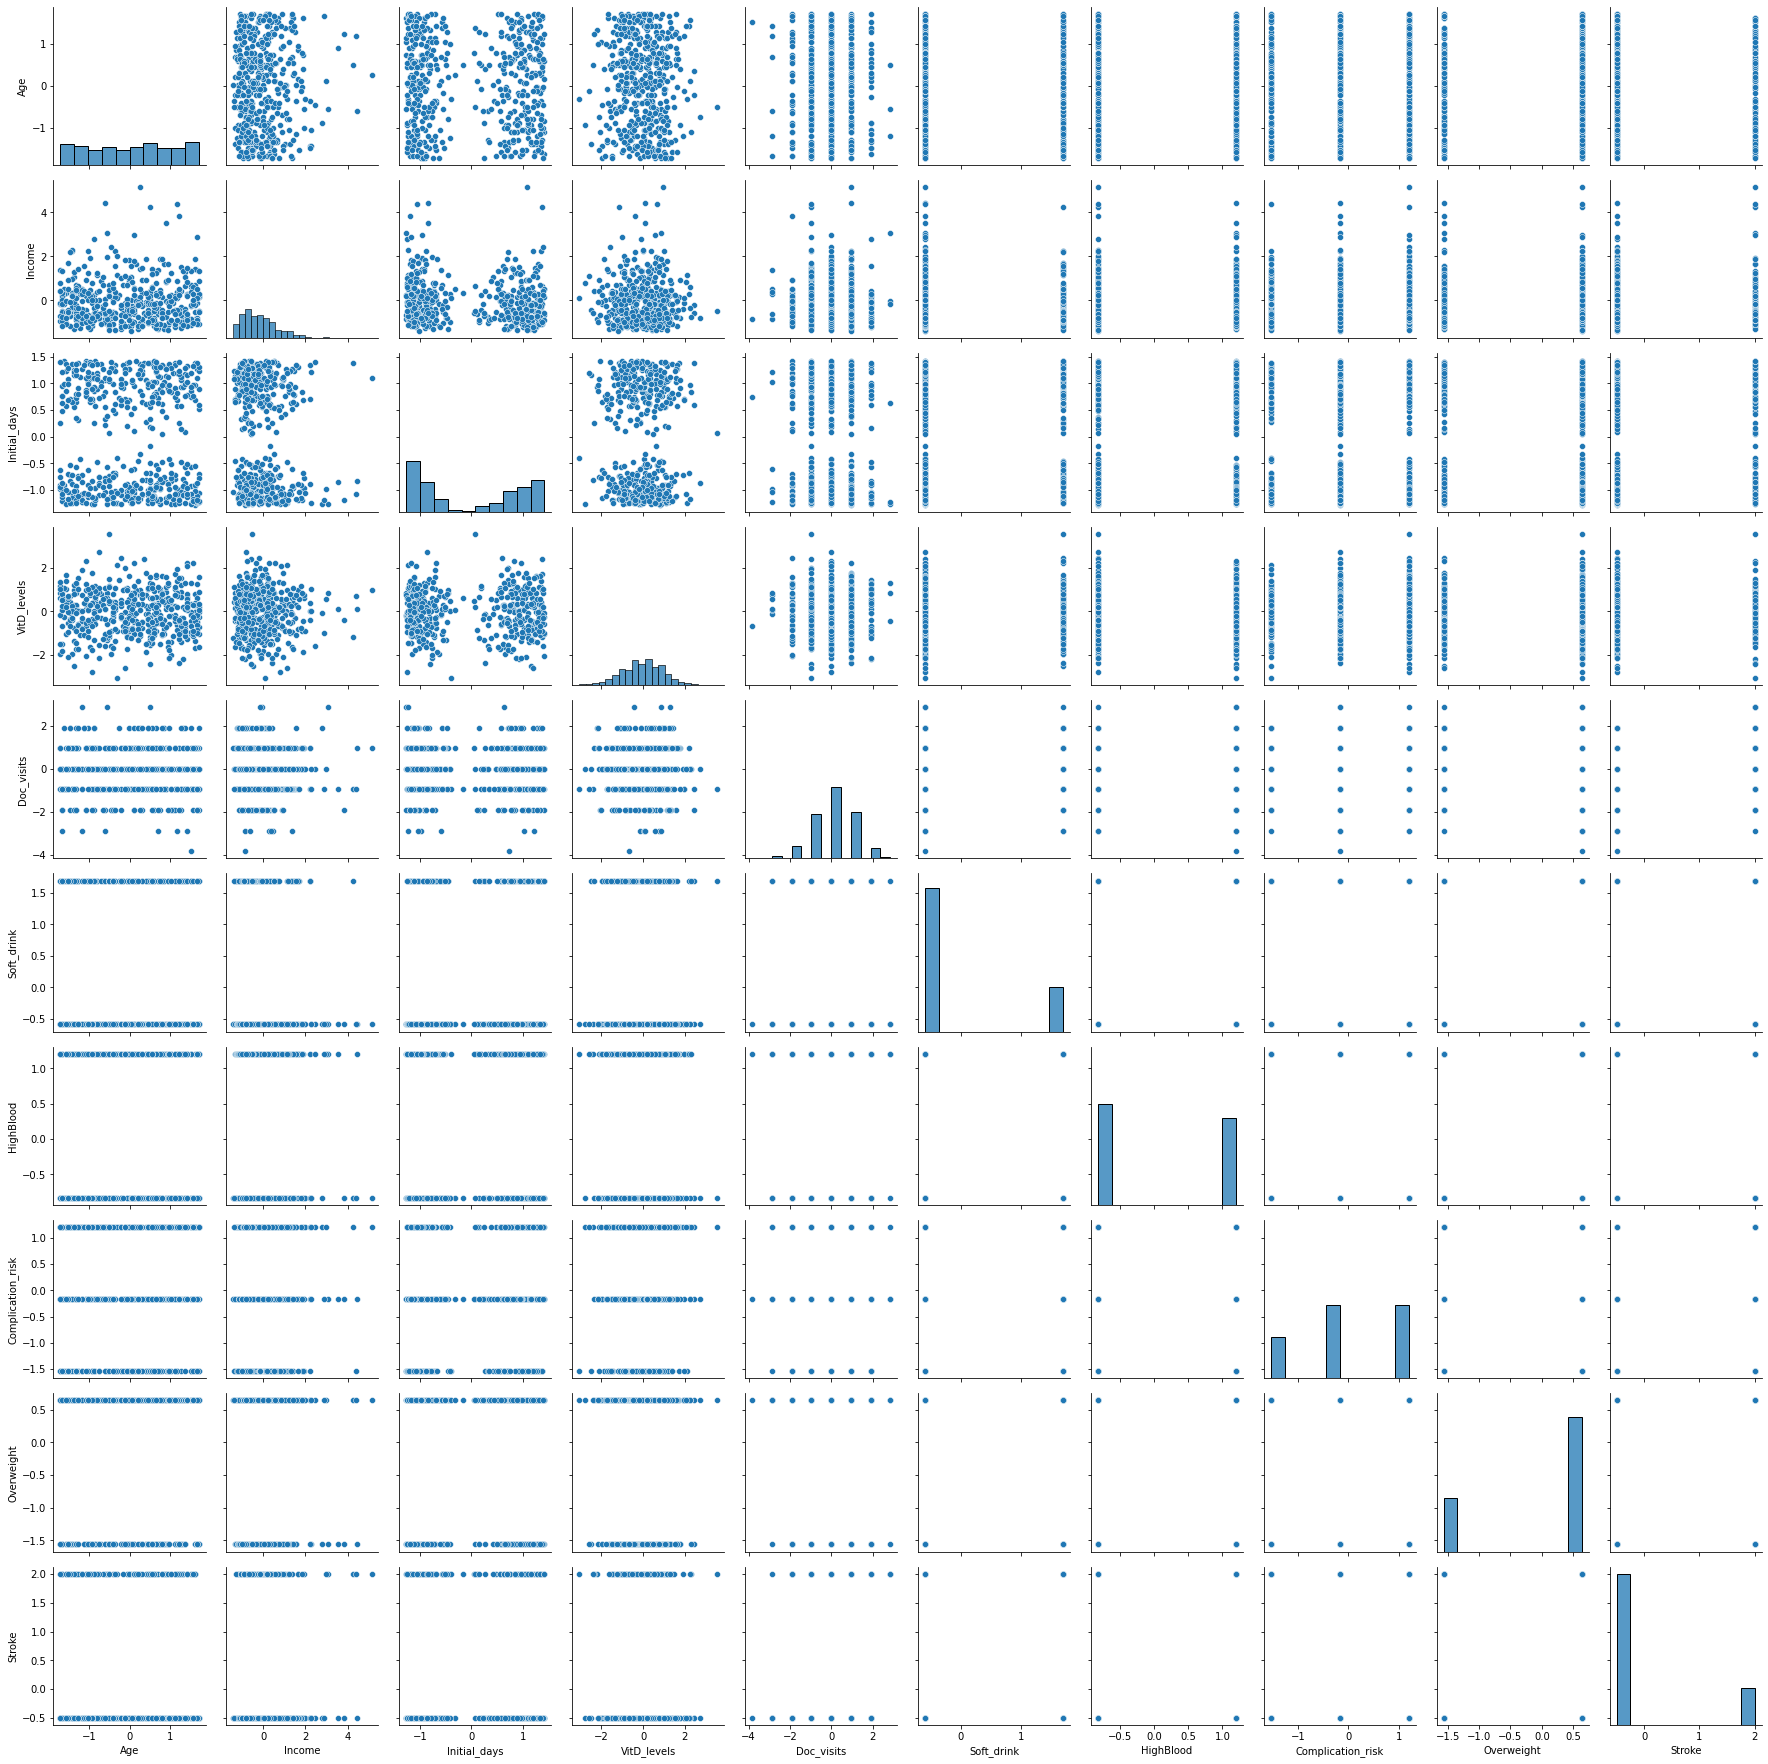

In [47]:
#https://seaborn.pydata.org/tutorial/axis_grids.html
#All Bivariate plots for the cleaned and scaled dataset

g = sns.PairGrid(med_df_scaled.sample(500))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

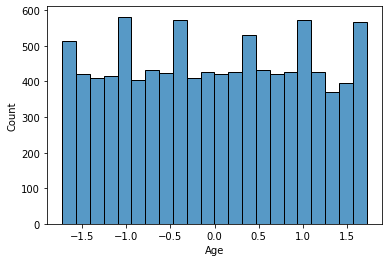

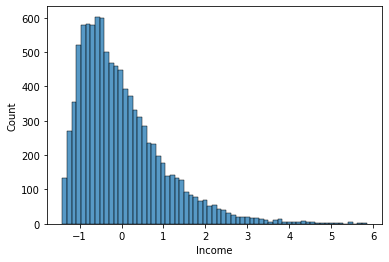

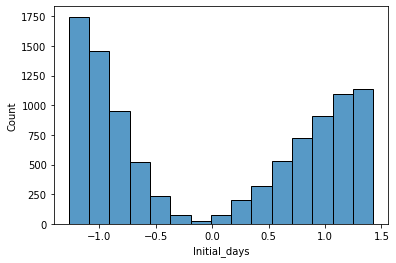

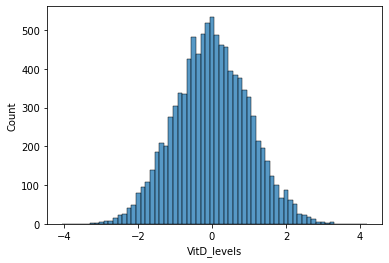

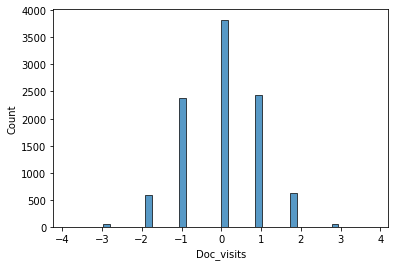

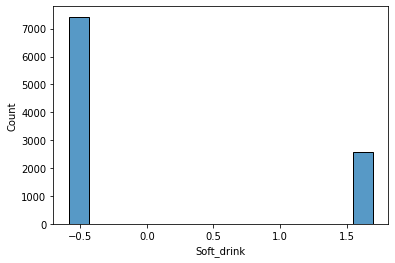

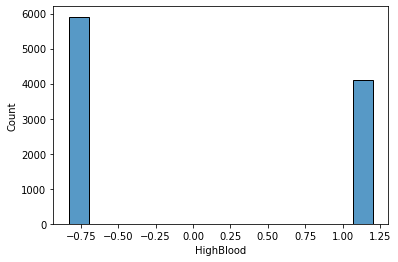

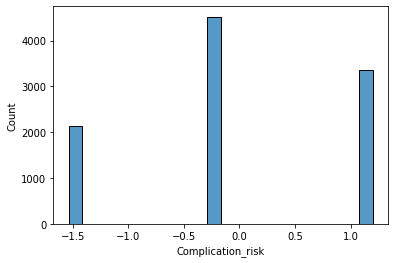

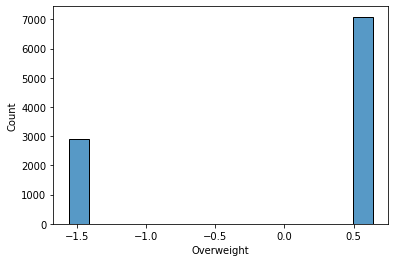

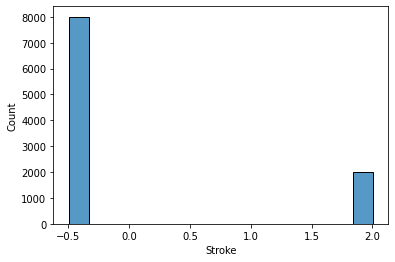

In [48]:
#All univariate plots for cleaned and sclaed dataset

for x in med_df_scaled.columns:
    sns.histplot(x = med_df_scaled[x])
    pyplot.show()

In [50]:
#Here is the copy of the cleaned and scaled dataset

med_df_scaled.to_csv('D208 - JacobColp - Cleaned Dataset.csv')